## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
x= df.query('group == "treatment" and landing_page != "new_page"').count()
y= df.query('group != "treatment" and landing_page == "new_page"').count()
x+y

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

This concludes that there are 3893 times the new_page and treatment didn't match.

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


As we can see from the dataframe information that there are no missing values here.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df.drop(df.query('group == "control" and landing_page != "old_page"').index,inplace=True)
df.drop(df.query('group != "control" and landing_page == "old_page"').index,inplace=True)


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

c. What is the row information for the repeat **user_id**? 

In [11]:
df[df.duplicated(subset='user_id', keep=False)]

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

The user_id that is repeated here as shown is 773192 and its row information are displayed above.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
df.drop_duplicates('user_id', keep= 'first', inplace= True)
df.info()
df.user_id.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [13]:
p= df.query('converted =="1"').count()/df.converted.count()
p.converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [14]:
control = df.query('group == "control"')
p2= control.query('converted =="1"').count()/control.converted.count()
p2.converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
treatment = df.query('group == "treatment"')
p3= treatment.query('converted =="1"').count()/treatment.converted.count()
p3.converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [16]:
p4= df.query('landing_page == "new_page"').count()/df.landing_page.count()
p4.landing_page

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

As we can see here, The probabilities of conversion for both control and treatment groups are almost the same (i.e no significant difference = 0.00158). 
This suggests for further analysis of the data through hypothesis testing. 

Another valid point is the fact that analysing the data from different points of view (like probability, hypothesis testing and confidence intervals) is a must to give the conclusion that is to be reached in the end enough confidence and finally yields a better business decision, thus in most cases we advice not to stick to probability testing alone. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 <= 0

H1 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [17]:
p_new = df.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [18]:
p_old = df.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [19]:
treatment = df.query('group == "treatment"')
n_new = treatment.user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [20]:
control = df.query('group == "control"')
n_old = control.user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

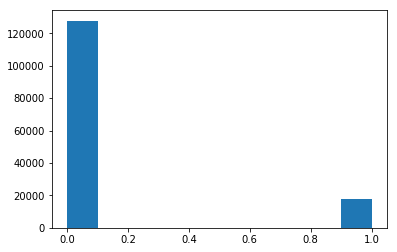

In [21]:
new_page_converted = np.random.choice([0,1] , n_new, p=[1-p_new, p_new])
new_page_converted 
plt.hist(new_page_converted);

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

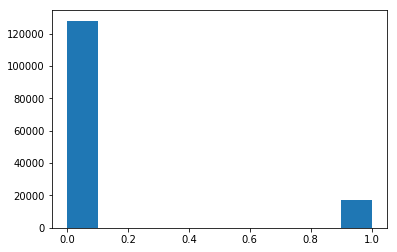

In [22]:
old_page_converted = np.random.choice([0,1] , n_old, p=[1-p_old, p_old])
old_page_converted 
plt.hist(old_page_converted);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [23]:
diffs = new_page_converted.mean() - old_page_converted.mean()
diffs 

0.0019318978736103387

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [24]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0,1] , n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0,1] , n_old, p=[1-p_old, p_old])
    diffs = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diffs)

p_diffs = np.array(p_diffs)
p_diffs

array([ 0.0008512 , -0.00176393, -0.00026365, ...,  0.0002597 ,
       -0.00020852, -0.00048385])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

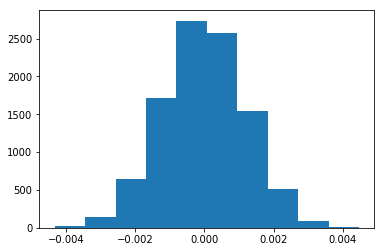

In [25]:
plt.hist(p_diffs);

The plot here shows as expected a histogram of the difference values between p_new and p_old showing a normal distribution as shown above. 

Later we will compute the actual difference and plot it on our histogram to see the proportion of our difference values smaller and greater than the actual difference. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

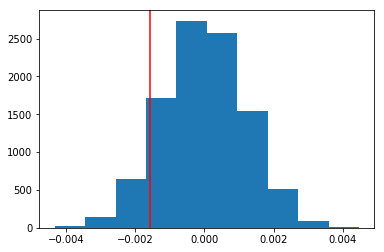

In [26]:
obs_diff = treatment.converted.mean() - control.converted.mean()
obs_diff
plt.hist(p_diffs);
plt.axvline(obs_diff, color= 'red');

As we can see here and after plotting the actual difference from our data set on the previous histogram, It can be observed that most of our data lies in the part that comes after our observed difference line (i.e greater than the observed difference) 

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In [27]:
null_vals = np.random.normal(0, np.std(p_diffs), p_diffs.size)
p_value = (null_vals > obs_diff).mean()
p_value

0.90390000000000004

Here we computed the P_value and it was found to be 0.9. 

Thus, Having an alpha value of 0.05 and since the P_value is significantly greater than our alpha value, this leads us to the conclusion that we Fail to Reject our null hypothesis here which is (H0 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 <= 0) 

This means we fail to reject the fact that there is no significant difference between the new page and the old one. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df.query('group =="control"').converted.sum()
convert_new = df.query('group =="treatment"').converted.sum()
n_old = df.query('group =="control"').converted.count()
n_new = df.query('group =="treatment"').converted.count()
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [29]:
sm.stats.proportions_ztest(count = [convert_old, convert_new], nobs = [n_old, n_new], alternative = "smaller")

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The Z score mainly depends on our standard deviation, while the P-value is the value that gives us an idea about wheather to reject or accept a null hypothesis. 

In our case here both the Z-score and the P-value(either computed using "stats.proportions_ztest" or manually using our observed difference earlier) support the fact that we Fail to Reject the null hypothesis. 

Reference:https://desktop.arcgis.com/en/arcmap/latest/tools/spatial-statistics-toolbox/what-is-a-z-score-what-is-a-p-value.htm

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistice Regression 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
df['intercept']=1
df['ab_page'] = pd.get_dummies(df.group)['treatment']
df.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page  
0          1        0  
1          1        0  
2          1        1  
3          1        1  
4          1        0

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [31]:
import statsmodels.api as sm
logit_new = sm.Logit(df.converted, df[['intercept','ab_page']])
results = logit_new.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        01:35:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The P-value here is 0.19
In Part2 the P-value was computed based on the computed null values which were based on computing np.random.normal , while here in this part the P-value was computed based on the statsmodels.api.Logit function, This is the main reason for the difference here in p-values.

Our hypotheses here are:

H0 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 = 0

H1 = 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 != 0

Using the new P-value of 0.19, it is still larger than our alpha value which is 0.05 leading us to also fail to reject the null hypothesis as in part 2 (i.e we fail to reject that the new page is performing well as the old page)

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Our previous regression model was too simple and we strongly suggest here adding other variables to our model, because many variables may impact our response variable (conversion to the new page). 

Adding new variables may also impact the significance of one another. 

It may also give us a different confidence level to our model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [33]:
df2= pd.read_csv('countries.csv')
df2.head()
df_new = df.join(df2.set_index('user_id'), on='user_id')
df_new.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page country  
0          1        0      US  
1          1        0      US  
2          1        1      US  
3          1        1      US  
4          1        0      US

In [34]:
df2.groupby('country').count()

user_id
country         
CA         14499
UK         72466
US        203619

In [35]:
df_new['intercept']=1
df_new[['UK','US','CA']]= pd.get_dummies(df_new.country)
df_new.drop('CA',axis=1)
logit_new2 = sm.Logit(df_new.converted, df_new[['intercept','ab_page','UK','US']])
results = logit_new2.fit()
df_new.head()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page country  UK  US  CA  
0          1        0      US   0   0   1  
1          1        0      US   0   0   1  
2          1        1      US   0   0   1  
3          1        1      US   0   0   1  
4          1        0      US   0   0   1

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        01:35:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [37]:
print(np.exp(results.params))
print(1/np.exp(results.params))

intercept    0.136795
ab_page      0.985168
UK           0.960062
US           1.009932
dtype: float64
intercept    7.310207
ab_page      1.015056
UK           1.041599
US           0.990165
dtype: float64


We needed here to exponentiate all of our coefficients because all the values computed at first were either smaller than 1 or in negative values(the intercept). 

That is why this exponentiation step was important to interpret our data in a more simplified and easier to understand way. 

### Conculsion: 
First of all, the P-value here is still greater than 0.05 which confirms the fact that we still fail to reject the null hypothesis here. 

Secondly, For each one unit decrease in ab_page, the conversion rate is 1.015 times more likely holding all other variables constant. 

Thirdly, For For each one unit increase in UK, the conversion rate is 0.96 times more likely holding all other variables constant. 

Finally, For each one unit increase in US, the conversion rate is 1.009 times more likely holding all other variables constant. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

Due to the negative value of our intercept and the very small values of the variables coefficients, It would be very useful here to exponentiate our values into quadratics in order to be more able to interpret our results. 

In [38]:
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_page'] = df_new['US'] * df_new['ab_page']
logit_final = sm.Logit(df_new.converted, df_new[['intercept','ab_page','UK','US','UK_page','US_page']])
results = logit_final.fit()
df_new.head()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page country  UK  US  CA  UK_page  US_page  
0          1        0      US   0   0   1        0        0  
1          1        0      US   0   0   1        0        0  
2          1        1      US   0   0   1        0        0  
3          1        1      US   0   0   1        0        0  
4          1        0      US   0   0   1        0        0

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 21 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        01:35:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0175      0.038     -0.465      0.642      -0.091       0.056
US            -0.0057      0.019     -0.306      0.760      -0.043       0.031
UK_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
US_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [40]:
print(np.exp(results.params))
print(1/np.exp(results.params))

intercept    0.137178
ab_page      0.979646
UK           0.982625
US           0.994272
UK_page      0.954198
US_page      1.031896
dtype: float64
intercept    7.289813
ab_page      1.020776
UK           1.017682
US           1.005761
UK_page      1.048001
US_page      0.969090
dtype: float64


### Conculsion: 
First of all, the P-value here is still greater than 0.05 which confirms the fact that we still fail to reject the null hypothesis here. 

Secondly, For each one unit decrease in ab_page, the conversion rate is 1.02 times more likely holding all other variables constant. 

Thirdly, For For each one unit increase in UK, the conversion rate is 0.98 times more likely holding all other variables constant. 

Fourth, For each one unit increase in US, the conversion rate is 0.99 times more likely holding all other variables constant. 

Fifth, For each one unit increase in US_page, the conversion rate is 1.03 times more likely holding all other variables constant. 

Finally, For each one unit increase in UK_page, the conversion rate is 0.95 times more likely holding all other variables constant. 

We can't see here large significance for combining the country with the ab_page, because the values of the combined values didn't differ much from the values of the country alone or the ab_page alone. 

### Questions: 

1) In the probability part, Why did you advise to use df2 instead of updating the original df as I did with my data frame here? Is it considered best practice to every couple of steps update my df expression into df2 and df3 ..etc? 

2) Is it considered best practice to use all the possible ways to test any hypothesis in order to make sure of my results (i.e perform hypothesis testing, probability testing and regression techniques) ? Or did we do this here out of practicing all the possible ways of analysing our data to reach a business decision? 

3) I understand how I can interpret the results summary I get from each logistic regression model, but I am wondering how can I explain my conclusions drawn from the model summary to the business decision maker (i.e I can understand a statement like "For each one unit increase in UK_page, the conversion rate is 0.95 times more likely holding all other variables constant." , but how can I explain this to the manager of the site in order to understand what that statement means and how this leads to our business decision in this case? 


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0